<a href="https://colab.research.google.com/github/kcms2ll/AI-Study/blob/main/ETest/src/overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/rabbit_challenge/DNN_code')
sys.path.append('/content/drive/MyDrive/rabbit_challenge/DNN_code/lesson_2')

import numpy as np
import matplotlib.pyplot as plt
from common import functions

import numpy as np
from common import layers
from collections import OrderedDict
from common import functions
from data.mnist import load_mnist
import matplotlib.pyplot as plt
from multi_layer_net import MultiLayerNet

# 過学習

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.19666666666666666
                : 10. 正答率(テスト) = 0.1661
Generation: 20. 正答率(トレーニング) = 0.26
                : 20. 正答率(テスト) = 0.2102
Generation: 30. 正答率(トレーニング) = 0.33666666666666667
                : 30. 正答率(テスト) = 0.2549
Generation: 40. 正答率(トレーニング) = 0.4033333333333333
                : 40. 正答率(テスト) = 0.3086
Generation: 50. 正答率(トレーニング) = 0.48
                : 50. 正答率(テスト) = 0.3409
Generation: 60. 正答率(トレーニング) = 0.5
                : 60. 正答率(テスト) = 0.3701
Generation: 70. 正答率(トレーニング) = 0.5233333333333333
                : 70. 正答率(テスト) = 0.4035
Generation: 80. 正答率(トレーニング) = 0.5366666666666666
                : 80. 正答率(テスト) = 0.4177
Generation: 90. 正答率(トレーニング) = 0.5666666666666667
                : 90. 正答率(テスト) = 0.4404
Generation: 100. 正答率(トレーニング) = 0.5933333333333334
                : 100. 正答率(テスト) = 0.4558
Generation: 110. 正答率(トレーニング) = 0.62
                : 110. 正答率(テスト) = 0.4883
Generation: 120. 正答率(トレーニング) = 0.6433333333333333
            

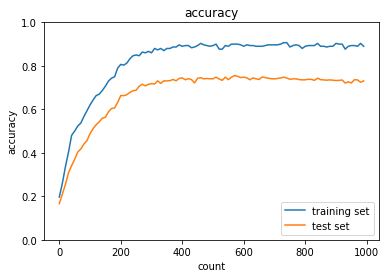

In [3]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]


network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.1
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * network.params['W' + str(idx)]
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += 0.5 * weight_decay_lambda * np.sqrt(np.sum(network.params['W' + str(idx)] ** 2))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               


lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## L1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.29
                : 10. 正答率(テスト) = 0.2437
Generation: 20. 正答率(トレーニング) = 0.44
                : 20. 正答率(テスト) = 0.3198
Generation: 30. 正答率(トレーニング) = 0.8133333333333334
                : 30. 正答率(テスト) = 0.6693
Generation: 40. 正答率(トレーニング) = 0.51
                : 40. 正答率(テスト) = 0.3877
Generation: 50. 正答率(トレーニング) = 0.86
                : 50. 正答率(テスト) = 0.691
Generation: 60. 正答率(トレーニング) = 0.84
                : 60. 正答率(テスト) = 0.688
Generation: 70. 正答率(トレーニング) = 0.92
                : 70. 正答率(テスト) = 0.7353
Generation: 80. 正答率(トレーニング) = 0.86
                : 80. 正答率(テスト) = 0.6722
Generation: 90. 正答率(トレーニング) = 0.8566666666666667
                : 90. 正答率(テスト) = 0.6589
Generation: 100. 正答率(トレーニング) = 0.8766666666666667
                : 100. 正答率(テスト) = 0.6943
Generation: 110. 正答率(トレーニング) = 0.7066666666666667
                : 110. 正答率(テスト) = 0.5664
Generation: 120. 正答率(トレーニング) = 0.9133333333333333
                : 120. 正答率(テスト) = 0.7119
Generation: 130.

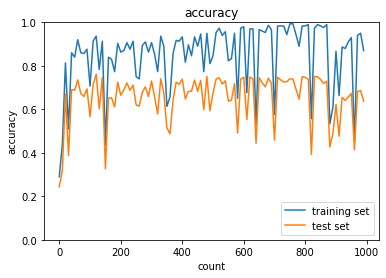

In [4]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.005
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### 正則化の強さを確認　0.005→　0.1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.49666666666666665
                : 10. 正答率(テスト) = 0.3522
Generation: 20. 正答率(トレーニング) = 0.5833333333333334
                : 20. 正答率(テスト) = 0.4523
Generation: 30. 正答率(トレーニング) = 0.6933333333333334
                : 30. 正答率(テスト) = 0.5434
Generation: 40. 正答率(トレーニング) = 0.6833333333333333
                : 40. 正答率(テスト) = 0.5652
Generation: 50. 正答率(トレーニング) = 0.7533333333333333
                : 50. 正答率(テスト) = 0.6219
Generation: 60. 正答率(トレーニング) = 0.63
                : 60. 正答率(テスト) = 0.5151
Generation: 70. 正答率(トレーニング) = 0.7566666666666667
                : 70. 正答率(テスト) = 0.584
Generation: 80. 正答率(トレーニング) = 0.45
                : 80. 正答率(テスト) = 0.4035
Generation: 90. 正答率(トレーニング) = 0.39666666666666667
                : 90. 正答率(テスト) = 0.3515
Generation: 100. 正答率(トレーニング) = 0.4866666666666667
                : 100. 正答率(テスト) = 0.4256
Generation: 110. 正答率(トレーニング) = 0.5733333333333334
                : 110. 正答率(テスト) = 0.4397
Generation: 120. 正答率(トレーニング) = 0.5

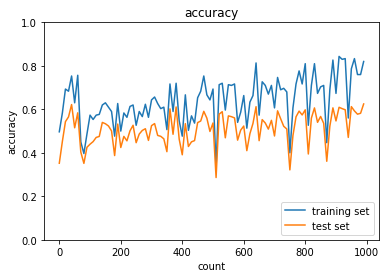

In [5]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)


iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10
hidden_layer_num = network.hidden_layer_num

# 正則化強度設定 ======================================
weight_decay_lambda = 0.01
# =================================================

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    weight_decay = 0
    
    for idx in range(1, hidden_layer_num+1):
        grad['W' + str(idx)] = network.layers['Affine' + str(idx)].dW + weight_decay_lambda * np.sign(network.params['W' + str(idx)])
        grad['b' + str(idx)] = network.layers['Affine' + str(idx)].db
        network.params['W' + str(idx)] -= learning_rate * grad['W' + str(idx)]
        network.params['b' + str(idx)] -= learning_rate * grad['b' + str(idx)]        
        weight_decay += weight_decay_lambda * np.sum(np.abs(network.params['W' + str(idx)]))

    loss = network.loss(x_batch, d_batch) + weight_decay
    train_loss_list.append(loss)        
        
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)
        
        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))               
                
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

## Dropout

In [6]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.09333333333333334
                : 10. 正答率(テスト) = 0.0967
Generation: 20. 正答率(トレーニング) = 0.10666666666666667
                : 20. 正答率(テスト) = 0.1044
Generation: 30. 正答率(トレーニング) = 0.12666666666666668
                : 30. 正答率(テスト) = 0.1111
Generation: 40. 正答率(トレーニング) = 0.14333333333333334
                : 40. 正答率(テスト) = 0.1199
Generation: 50. 正答率(トレーニング) = 0.17
                : 50. 正答率(テスト) = 0.1369
Generation: 60. 正答率(トレーニング) = 0.18666666666666668
                : 60. 正答率(テスト) = 0.1507
Generation: 70. 正答率(トレーニング) = 0.19
                : 70. 正答率(テスト) = 0.1663
Generation: 80. 正答率(トレーニング) = 0.19333333333333333
                : 80. 正答率(テスト) = 0.1817
Generation: 90. 正答率(トレーニング) = 0.21
                : 90. 正答率(テスト) = 0.1887
Generation: 100. 正答率(トレーニング) = 0.24333333333333335
                : 100. 正答率(テスト) = 0.2068
Generation: 110. 正答率(トレーニング) = 0.26
                : 110. 正答率(テスト) = 0.2165
Generation: 120. 正答率(トレーニング) = 0.2866666666666667
      

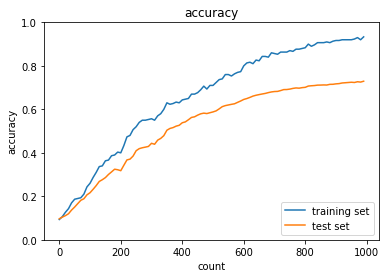

In [7]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.15
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### Dropout_ratio 0.15→0.1

データ読み込み完了
Generation: 10. 正答率(トレーニング) = 0.12666666666666668
                : 10. 正答率(テスト) = 0.1091
Generation: 20. 正答率(トレーニング) = 0.19
                : 20. 正答率(テスト) = 0.1447
Generation: 30. 正答率(トレーニング) = 0.25
                : 30. 正答率(テスト) = 0.1849
Generation: 40. 正答率(トレーニング) = 0.29
                : 40. 正答率(テスト) = 0.2182
Generation: 50. 正答率(トレーニング) = 0.30333333333333334
                : 50. 正答率(テスト) = 0.2334
Generation: 60. 正答率(トレーニング) = 0.31
                : 60. 正答率(テスト) = 0.2482
Generation: 70. 正答率(トレーニング) = 0.33666666666666667
                : 70. 正答率(テスト) = 0.258
Generation: 80. 正答率(トレーニング) = 0.3433333333333333
                : 80. 正答率(テスト) = 0.2682
Generation: 90. 正答率(トレーニング) = 0.3433333333333333
                : 90. 正答率(テスト) = 0.2689
Generation: 100. 正答率(トレーニング) = 0.39
                : 100. 正答率(テスト) = 0.2906
Generation: 110. 正答率(トレーニング) = 0.37666666666666665
                : 110. 正答率(テスト) = 0.2867
Generation: 120. 正答率(トレーニング) = 0.42
                : 120. 正答率(テスト) = 0.32

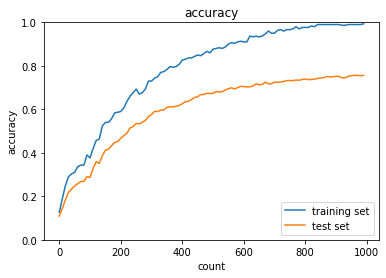

In [8]:
from common import optimizer
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
d_train = d_train[:300]

# ドロップアウト設定 ======================================
use_dropout = True
dropout_ratio = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda, use_dropout = use_dropout, dropout_ratio = dropout_ratio)
optimizer = optimizer.SGD(learning_rate=0.01)
# optimizer = optimizer.Momentum(learning_rate=0.01, momentum=0.9)
# optimizer = optimizer.AdaGrad(learning_rate=0.01)
# optimizer = optimizer.Adam()

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    optimizer.update(network.params, grad)

    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)    
    
    if (i+1) % plot_interval == 0:
        accr_train = network.accuracy(x_train, d_train)
        accr_test = network.accuracy(x_test, d_test)
        accuracies_train.append(accr_train)
        accuracies_test.append(accr_test)

        print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
        print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

In [ ]:
dropout率を下げると、過学習が起きた。